In [447]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

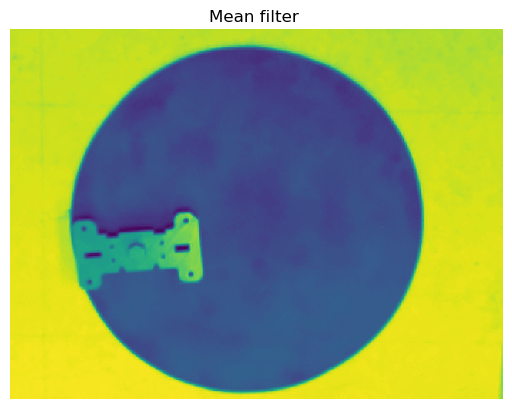

In [448]:
# Load image
img = cv2.imread('Michtingnot.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# kernelMean =  np.ones((31,31),np.float32)/ 961# 
# kernelMean =  np.ones((31,31),np.float32)/ 961# 

# apply it to the image now 
# imgMean = cv2.filter2D(gray,-1,kernelMean)# 


plt.imshow(gray)
plt.title('Mean filter ')
plt.axis('off')  # Turn off axis
plt.show()


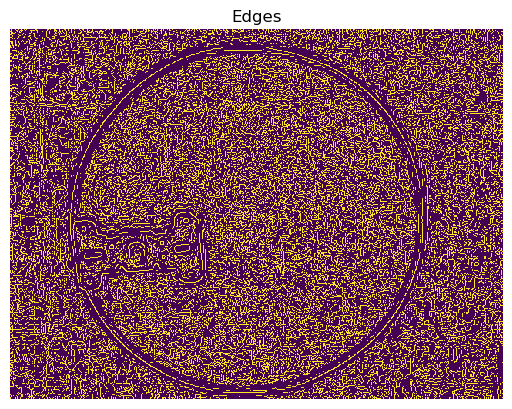

In [449]:
edges_inner_circle = cv2.Canny(img, threshold1=0, threshold2=0)

plt.imshow(edges_inner_circle)
plt.title('Edges')
plt.axis('off')
plt.show()

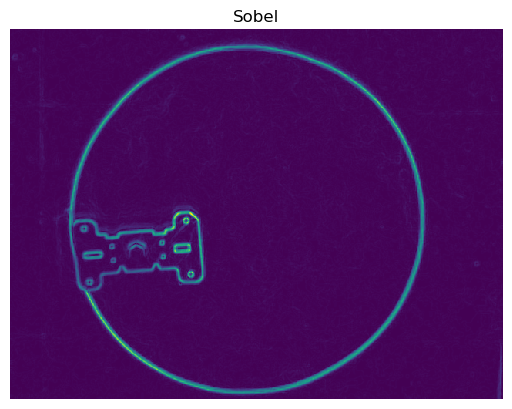

In [450]:

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

gX = cv2.convertScaleAbs(sobel_x )
gY = cv2.convertScaleAbs(sobel_y) 
# combine the gradient representations into a single image just to see what the sobel computation does
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

plt.imshow(combined)
plt.title('Sobel')
plt.axis('off')  # Turn off axis
plt.show()

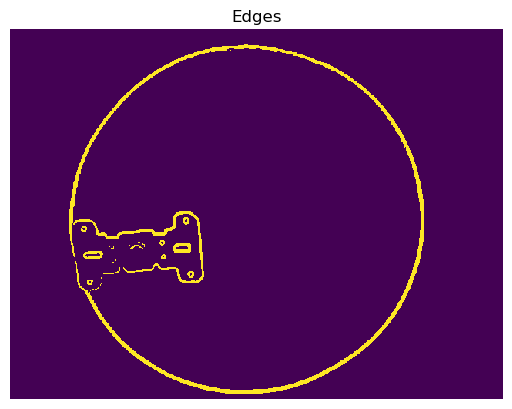

In [456]:
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

threshold = 110
edges = np.uint8(gradient_magnitude > threshold) * 255


# Convert edges to binary image
ret, binary_edges = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)
# Show the edges
plt.imshow(binary_edges)
plt.title('Edges')
plt.axis('off')
plt.show()

In [452]:
# # kernel = np.ones((5,5), np.uint8)
# # dilated_image = cv2.dilate(binary_edges, kernel, iterations=1)
# # eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# plt.imshow(bi)
# plt.title('Edges')
# plt.axis('off')
# plt.show()

Yes, object is withinnnn.


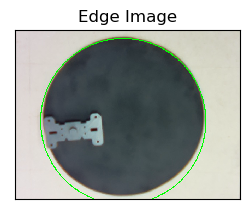

In [453]:
# Define parameter values
param1_values = [200]  # Upper threshold for the edge detector
param2_values = [40]   # Threshold for circle detection
dp_values = [1]        # Inverse ratio of the accumulator resolution to the image resolution

best_params = None
best_circles = None
best_circle_count = 0

# Calculate minDist value
minDist_value = img.shape[0] // 4

# Iterate over parameter combinations
for dp in dp_values:
    for param1 in param1_values:
        for param2 in param2_values:
            circles = cv2.HoughCircles(binary_edges,
                                       cv2.HOUGH_GRADIENT,
                                       dp=dp,
                                       minDist=minDist_value,
                                       param1=param1,
                                       param2=param2,
                                       minRadius=0,
                                       maxRadius=0)
            if circles is not None:
                circle_count = len(circles[0])
                if circle_count > best_circle_count:
                    best_circle_count = circle_count
                    best_params = (dp, minDist_value, param1, param2)
                    best_circles = circles
                    print("Yes, object is withinnnn.")
            else:
                print("like not evennnn super overhanging")
# Draw detected circles on the original image



# Draw detected circles on the original image
if best_circles is not None:
    best_circles = np.uint16(np.around(best_circles))
    for circle in best_circles[0, :1]:
        center = (circle[0], circle[1])
        radius = circle[2]
        # Draw circle
        cv2.circle(img, center, radius, (0, 255, 0), 2)
#         # Draw contour 100 pixels within the circle
#         roi = max(radius - 40, 0)
#         # cv2.circle(img, center, roi, (255, 0, 0), 2)
        





#         # Create a mask for the region outside of the ROI
#         mask = np.zeros_like(img)
#         # roi_image = cv2.bitwise_and(img, mask)
        
#         cv2.circle(mask, center, radius, (255, 255, 255), thickness=-1)  # Draw circle in the mask

        
#         # Set pixels outside of the ROI to a dark color (e.g., black)
#         img[mask[:,:,0] == 0] = [0, 0, 0] 


#         #  Create a copy of the resized image for drawing offset circles
#         # offset_image = roi_image.copy()

#         # Offset circles based on the detected circles
#         # for j in best_circles[0,:1]:
#         #     x_offset, y_offset, r_offset = j[0] - x, j[1] - y, j[2]
#         #     # Calculate inward offset
#         #     inward_offset = 100 # Define your inward offset here
#         #     offset = int(inward_offset / math.sqrt(2))
#         #     # Adjust radius with inward offset
#         #     r_offset -= offset
#         #     print('r_offset = ' + str(r_offset))
#         #     # Draw inner circle
#         #     cv2.circle(offset_image, (x_offset, y_offset), r_offset, (255, 0, 0), 10)
#         #     # Calculate perimeter
#         #     perimeter = 2 * math.pi * r_offset


#         roi_gray = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)
#         grad_x = cv2.Sobel(roi_gray, cv2.CV_64F, 1, 0, ksize=3)
#         grad_y = cv2.Sobel(roi_gray, cv2.CV_64F, 0, 1, ksize=3)
#         gradient_magnitude2 = cv2.magnitude(grad_x, grad_y)
            

#         threshold2= 11
#         exceed = np.uint8(gradient_magnitude2 > threshold2) * 255

#         ret, binary_edges2 = cv2.threshold(exceed, 0, 255, cv2.THRESH_BINARY)

# #         contours, _ = cv2.findContours(exceed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
# # # Draw contours around the areas where the gradient magnitude exceeds the threshold
# #         contour_image = np.zeros_like(offset_image)
# #         cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
            
# #             for edge_pixel in np.argwhere(exceed):
# #                 x_edge, y_edge = edge_pixel[1], edge_pixel[0]
# #     # Calculate distance between edge pixel and circle center
# #                 distance = math.sqrt((x_edge - x_offset)**2 + (y_edge - y_offset)**2)
# #                 print('distance = ' + str(distance))
# #                 if distance > r_offset:
# #                     print("Edge pixel exceeds perimeter")

# #                 else :
# #                     print("Edge pixel is within perimeter")
       


# plt.subplot(121),plt.imshow(img)
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [454]:
edges_inner_circle = cv2.Canny(roi_image, threshold1=0, threshold2=0)

plt.imshow(edges_inner_circle)
plt.title('Edges')
plt.axis('off')
plt.show()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'Canny'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'
>  - Canny() missing required argument 'dy' (pos 2)
>  - Canny() missing required argument 'dy' (pos 2)


now display the egdes detction in ROI and the overlapping test make sure to stop program when the ROI is not being detected no more .

problem is that its taking the egde of the circle in account . so set a new perimiter that would be the ROI cuz its taking the outside edges.

ok now do edge detection is the small perimter i have and , if circel not detectiong then print message overhang